<a href="https://colab.research.google.com/github/laucer/machine-learning/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multilayer Perceptron - MNIST

In [3]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop



Using TensorFlow backend.


## Download dataset

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11493376/11490434 [==============================] - 1s 0us/step



## Let's see example images from train dataset


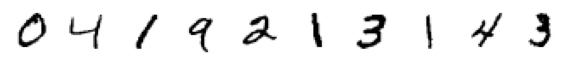

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(1, 11):
  plt.subplot(1, 10, i)  
  plt.axis('off')
  plt.imshow(X_train[i], cmap='Greys')


## Prepare data
1. Image is represented by a single vector
2. Cast to $float32$
3. Standarize data
4. $y$ is represented by a vector of size 10 filled with zeroes and one.
Example: $[0,1,0,0,0,0,0,0,0,0]$ represents digit 1.

In [0]:
X_train = X_train.reshape(60000, 28 * 28)
X_test = X_test.reshape(10000, 28*28)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = X_train/255
X_test = X_test/255

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


## Build a model

In [7]:
model = Sequential()
model.add(Dense(units=512, activation='relu', input_shape=(28*28,)))
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


## Train the model

In [8]:
model.compile(optimizer=RMSprop(), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=128, epochs=32, validation_data=(X_test,y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/32
60000/60000 [==============================] - 6s 105us/step - loss: 0.2177 - accuracy: 0.9333 - val_loss: 0.1079 - val_accuracy: 0.9671
Epoch 2/32
60000/60000 [==============================] - 6s 100us/step - loss: 0.0824 - accuracy: 0.9755 - val_loss: 0.0817 - val_accuracy: 0.9756
Epoch 3/32
60000/60000 [==============================] - 6s 100us/step - loss: 0.0550 - accuracy: 0.9836 - val_loss: 0.0879 - val_accuracy: 0.9762
Epoch 4/32
60000/60000 [==============================] - 6s 101us/step - loss: 0.0389 - accuracy: 0.9876 - val_loss: 0.0797 - val_accuracy: 0.9797
Epoch 5/32
60000/60000 [==============================] - 6s 100us/step - loss: 0.0296 - accuracy: 0.9913 - val_loss: 0.0798 - val_accuracy: 0.9807
Epoch 6/32
60000/60000 [==============================] - 6s 100us/step - loss: 0.0243 - accuracy: 0.9923 - val_loss: 0.0824 - val_accuracy: 0.9814
Epoch 7/32
60000/60000 [==============================] - 6s 1